Given are normal distributed observations $x_i,i = 1,...,10:$
2.27, 1.17, 3.58, 3.95, 3.13, -1.50, 4.71, 2.58, 4.05 and 5.20.
What are plausible values for the parameters $\mu$ and $\sigma$ ?
Determine the posterior distribution of $\mu$ and $\sigma$. Assume
independent priors $\mu \sim Norm(1, 10^2)$ and $\sigma \sim Gamma(8, 4)$.

## $P(\mu,\sigma\mid D) \propto \color{blue}{\sigma^{-10}} \color{red}{e^{\frac{-\sum_{i=1}^{n}(x_i - \mu)^2}{2\mu^2}}} \cdot \color{green}{e^{\frac{-(\mu - 1)^2}{200}}} \cdot \color{blue}{\sigma^7} e^{-4\sigma}$

$\color{blue}{-3*log(sigma)} -4*sigma \color{green}{-(mu-1)^2/200} \color{red}{-(sum((obs-mu)^2)/(2*sigma^2))}$

In [7]:
# Simulated data-points from rnorm(10,3,2)
obs = c(2.27,  1.17,  3.58,  3.95,  3.13, -1.50,  4.71,  2.58,  4.05, 5.20)
# Posterior
logStatDistribution = function(mu,sigma)
{
  -3*log(sigma)-4*sigma-(mu-1)^2/200-(sum((obs-mu)^2)/(2*sigma^2))
}

m = rnorm(1,1,10)
s = rgamma(1,8,4)
m_sample = c()
s_sample = c()
# Baysian Data Analysis via MCMC
for(i in 1:10000)
{
    mean_prop = rnorm(1,m,.1)
    sd_prop   = abs(rnorm(1,s,.1))
    u = runif(1,0,1)
    if( u < exp(logStatDistribution(mean_prop,sd_prop)-logStatDistribution(m,s)))
    {
        m = mean_prop
        s = sd_prop
    }
    m_sample = c(m_sample,m)
    s_sample = c(s_sample,s)
}

## Evaluation

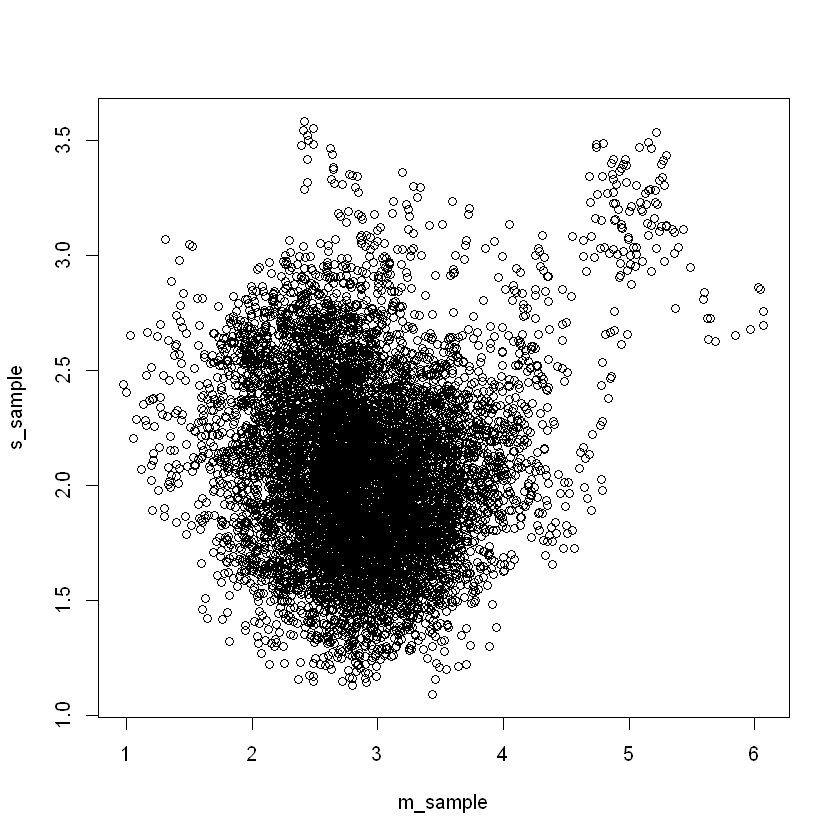

In [2]:
plot(m_sample,s_sample)

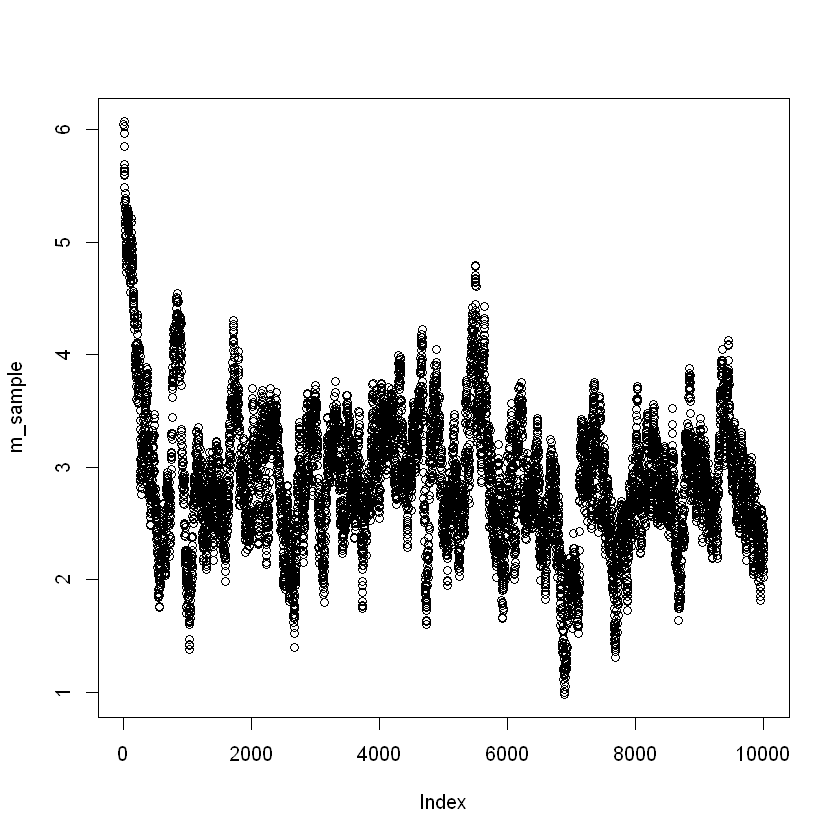

In [3]:
plot(m_sample)

In [4]:
m_iid = m_sample[seq(2000,10000,100)]
s_iid = s_sample[seq(2000,10000,100)]

quantile(m_iid,c(0.05,0.95))

5%      95% 
2.029462 3.528984

In [5]:
quantile(s_iid,c(0.05,0.95))

5%      95% 
1.522066 2.733156